In [1]:
!pip install opendatasets

In [2]:
# prompt: install transformers , accelerate , detasets , bertviz , umap-learn , sentencepiece , urllib3 py7zr

!pip install -U transformers accelerate datasets bertviz umap-learn sentencepiece
!pip install --upgrade urllib3
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from datasets import load_dataset

df = load_dataset("abisee/cnn_dailymail", "3.0.0")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [4]:
from transformers import pipeline

pipeline = pipeline("text-generation", model="gpt2-medium", device="cuda")

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda


In [5]:
df['train'][1]['article'][:1000]

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to foll

In [6]:
input_text = df['train'][1]['article'][:2000]
query = input_text + "\nTL;DR:\n"
pipe_out = pipeline(query , max_length = 512 , clean_up_tokenization_spaces = True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [7]:
pipe_out

[{'generated_text': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and

In [8]:
pipe_out[0]['generated_text'][len(query):]

"1. The inmates are suffering from mental illness.\n2. They're not getting any help.\n3. Jail guards are treating these mentally ill people better than the state does. The inmates have been placed on the ninth floor because they're mentally ill.\n3. It's not easy to get inside jail.\n4.\xa0\n5. A lot of the mental illness is related to jail.\n6.\xa0\n7.\n8."

In [9]:
summaries = {}
summaries["gpt-2medium-380M"] = pipe_out[0]['generated_text'][len(query):]

In [10]:
from transformers import pipeline

pipe = pipeline("summarization", model="google-t5/t5-base")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [11]:
pipe_out = pipe(input_text)
pipe_out[0]['summary_text']

'mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won\'t do what police say, judge says .'

In [12]:
summaries["t5-base"] = pipe_out[0]['summary_text']

In [13]:
# # Use a pipeline as a high-level helper
# from transformers import pipeline

# pipe = pipeline("summarization", model="facebook/bart-large-cnn")

In [14]:
pipeq_out = pipe(input_text)
pipe_out[0]['summary_text']

'mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won\'t do what police say, judge says .'

In [15]:
summaries["bart-large-cnn"] = pipe_out[0]['summary_text']

In [16]:
# #pegasus model
# # Use a pipeline as a high-level helper
# from transformers import pipeline

# pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")

In [17]:
pipe_out = pipe(input_text)
pipe_out[0]['summary_text']

'mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won\'t do what police say, judge says .'

In [18]:
summaries["pegasus-cnn-568M"] = pipe_out[0]['summary_text']

In [19]:
for model in summaries:
  print(model.upper())
  print(summaries[model])
  print("")

GPT-2MEDIUM-380M
1. The inmates are suffering from mental illness.
2. They're not getting any help.
3. Jail guards are treating these mentally ill people better than the state does. The inmates have been placed on the ninth floor because they're mentally ill.
3. It's not easy to get inside jail.
4. 
5. A lot of the mental illness is related to jail.
6. 
7.
8.

T5-BASE
mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they're ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won't do what police say, judge says .

BART-LARGE-CNN
mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they're ready to appear . a judge says the arrests often result from confrontations with police . mentally ill peo

# FINE-TUNNING SUMMARIZATION MODEL ON CUSTOM DATASET

In [20]:
from datasets import load_dataset
from transformers import pipeline
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

device = 'cuda' if torch.cuda.is_available() else 'cpu'
modek_ckpt = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(modek_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(modek_ckpt).to(device)


config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [21]:
df

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [22]:
df['train'][0]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [23]:
article_len = [len(x['article'].split()) for x in df['train']]
summary_len = [len(x['highlights'].split()) for x in df['train']]

array([[<Axes: title={'center': 'article_len'}>,
        <Axes: title={'center': 'summary_len'}>]], dtype=object)

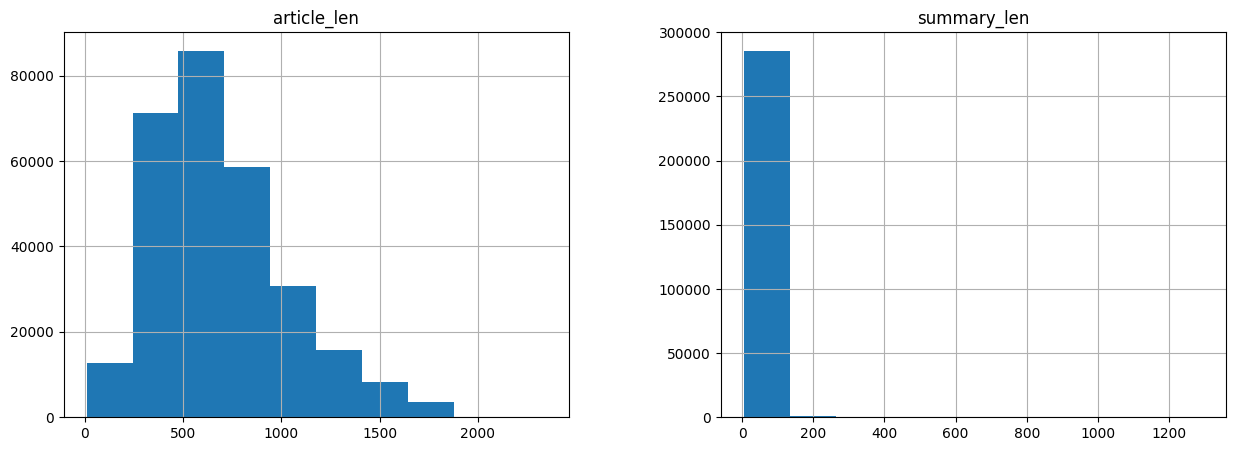

In [24]:
import pandas as pd
data = pd.DataFrame([article_len,summary_len]).T
data.columns = ['article_len','summary_len']

data.hist(figsize=(15,5))


In [25]:
def get_feature(batch):
  encodings = tokenizer(batch['article'],text_target = batch['highlights'],truncation = True, max_length = 1024)
  encodings = {'input_ids':encodings['input_ids'],'attention_mask':encodings['attention_mask'] , 'labels' : encodings['labels']}
  return encodings

In [26]:
df_pt = df['train'].select(range(10000)).map(get_feature , batched = True)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [27]:
columns = ['input_ids','attention_mask','labels']
df_pt.set_format(type = 'torch', columns = columns)

In [28]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer = tokenizer , model = model)

In [29]:
from transformers import TrainingArguments , Trainer

training_args = TrainingArguments(
    output_dir = './results',
    num_train_epochs = 1,
    warmup_steps = 500,
    per_device_train_batch_size = 4,
    per_device_eval_batch_size = 4,
    weight_decay = 0.01,
    logging_steps = 10,
    log_level = 'error',
    eval_strategy = 'steps',
    eval_steps = 500,
    save_steps = 1e6,
    gradient_accumulation_steps = 16
)

In [30]:
trainer = Trainer(model = model , args = training_args , train_dataset = df_pt, eval_dataset = df['validation'].select(range(1000)) , tokenizer = tokenizer , data_collator = data_collator)

/tmp/ipython-input-30-1795236656.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model = model , args = training_args , train_dataset = df_pt, eval_dataset = df['validation'].select(range(1000)) , tokenizer = tokenizer , data_collator = data_collator)


In [31]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: powervr5-0-1 (powervr5-0-1-suvidha-foundation) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.11/dist-packages/transformers/data/data_collator.py:741: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss


Step,Training Loss,Validation Loss


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3685: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=157, training_loss=1.5071108386774732, metrics={'train_runtime': 4174.0799, 'train_samples_per_second': 2.396, 'train_steps_per_second': 0.038, 'total_flos': 2.041835797807104e+16, 'train_loss': 1.5071108386774732, 'epoch': 1.0})

In [32]:
trainer.save_model('bart_fine_tunned')

In [34]:
pipe = pipeline('summarization' , model = 'bart_fine_tunned')
gen_kwargs = {'length_penalty' : 0.8 , 'num_beams' : 8 , "max_length" : 128}

custom_txt = """
The government has gone into an overdrive to track alleged cartelization in the cement industry.

Based on a complaint filed by the Builders Association of India (BAI), the office of the Director General of Investigations and Registration (DGIR), which comes under the ministry of corporate affairs (MCA), has initiated investigations against 45 cement companies for alleged cartelization.

This is over and above the six cases of cartelization that are already pending with the Monopolies and Restrictive Trade Practices Commission (MRTPC), also part of the ministry.

“We started work on this (investigation) in October 2006 and have brought 45 cement companies in the ambit of our investigation,” said a senior DGIR official who did not want to be named. The DGIR can initiate investigation on its own and also conduct them on behalf of the MRTPC.

Rajpal Arora, honorary secretary, BAI, said that the association took up the matter with DGIR when it realized that it observed a steep escalation in prices of cement. “Between December 2005 and April 2006, the price of a 50kg bag of cement, rose from anywhere between Rs125 and Rs145, to Rs200 plus. The input costs, however, had not risen in the same proportion.”

Cement comprises 13-15% of the cost component of any construction project. There are 130 large cement plants and 365 mini cement plants in the country. The installed capacity of large plants are 160mt (million tonnes) per annum and total production is around 140mt per annum.

MRTPC, in another case, on Tuesday, has issued notices of inquiry against 14 leading cement companies as well as the Cement Manufacturers Association (CMA) for price fixing and cartelization.

The inquiry is based on the preliminary report of the DGIR and according to the official, the case will have its first hearing on 25 October this year.

The notices were first reported by The Economic Times.

In another case, which has been pending before the MRTPC for 17 years (since 1990), hearings are still going on. “The hearing for this particular case, where the parties involved are DGIR and Cement Manufacturers Association, has been going on,” said an MRTPC official, who did not wish to be named. Yet another case, DGIR versus ACC, dates back to 1992.

Experts say delay in disposing off cases are both on account of archaic laws and difficulty is proving cartelization cases.

“Nevertheless, countries like Mexico, Romania and Germany have disposed off cases of such cartelization and I hope the MRTPC will also be able to finalize the pending cases,” said an expert in the area of restrictive trade practices, who did not wish to be identified.

He also added that big players such as Lafarge, Holcim and Heidelberg Cement have come under the scanner of governments in various countries.

O.P. Dua, senior advocate, who has been arguing the DGIR versus CMA case initiated in 1990, despite the difficulty in proving cartelization, is hopeful of winning the case. “The matter got delayed as there were 45 cement companies involved and each one took its own time to file affidavits etc. and besides, the matter was referred to the high court in between,” said Dua.

He added that in another case, which is also pending with the MRTPC, he has found clear evidence of price fixing by cement manufacturers in Madhya Pradesh.

The CMA is involved in more than half the cases that are pending before the MRTPC.

"""

print(pipe(custom_txt , **gen_kwargs))

/usr/local/lib/python3.11/dist-packages/transformers/models/bart/configuration_bart.py:177: UserWarning: Please make sure the config includes `forced_bos_token_id=0` in future versions. The config can simply be saved and uploaded again to be fixed.
  warnings.warn(


[{'summary_text': 'The government has gone into an overdrive to track alleged cartelization in the cement industry .\nBased on a complaint filed by the Builders Association of India (BAI), the office of the Director General of Investigations and Registration (DGIR) has initiated investigations against 45 cement companies .\nThis is over and above the six cases of cartelization that are already pending with the Monopolies and Restrictive Trade Practices Commission (MRTPC)'}]


In [33]:
!zip bart_fine_tunned.zip -r bart_fine_tunned/

  adding: bart_fine_tunned/ (stored 0%)
  adding: bart_fine_tunned/training_args.bin (deflated 51%)
  adding: bart_fine_tunned/tokenizer.json (deflated 82%)
  adding: bart_fine_tunned/merges.txt (deflated 53%)
  adding: bart_fine_tunned/special_tokens_map.json (deflated 52%)
  adding: bart_fine_tunned/vocab.json (deflated 59%)
  adding: bart_fine_tunned/tokenizer_config.json (deflated 75%)
  adding: bart_fine_tunned/config.json (deflated 62%)
  adding: bart_fine_tunned/model.safetensors (deflated 7%)
  adding: bart_fine_tunned/generation_config.json (deflated 48%)


In [35]:
import os
os.listdir()


['.config',
 'results',
 'bart_fine_tunned',
 'wandb',
 'bart_fine_tunned.zip',
 'sample_data']

In [36]:
from google.colab import files
files.download('bart_fine_tunned.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# prompt: evaluate model in rogue1 , 2 , L

!pip install rouge_score

from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Replace with your reference summaries and generated summaries
reference_summaries = ["This is the reference summary for example 1.", "This is the reference summary for example 2."]
generated_summaries = ["This is the generated summary for example 1.", "This is the generated summary for example 2."]

for i in range(len(reference_summaries)):
  scores = scorer.score(reference_summaries[i], generated_summaries[i])
  print(f"Scores for example {i+1}:")
  print(scores)
  print("-" * 20)


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=b8a5022069707c70c34c52cfa07019060acf4012173976aa0c64d4a305fee7b2
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
Scores for example 1:
{'rouge1': Score(precision=0.875, recall=0.875, fmeasure=0.875), 'rouge2': Score(precision=0.7142857142857143, recall=0.7142857142857143, fmeasure=0.7142857142857143), 'rougeL': Score(precision=0.875, recall=0.875, fmeasure=0.875)}
--------------------
Scores for example 2:
{'rouge1': Score(precision=0.875, recall=0.875, fmeasure=0.875), 'rouge2': Score(precision=0.7142857142857143, recall=0.7142857142857143, fmeasure=0.7142857142857143), 'rougeL': Score(precision=0.875, recall=0.875, fmeasure=0.875)}
--------------------


ValueError: All arrays must be of the same length

Comparison Table:
                        ROUGE-1  ROUGE-2  ROUGE-L  Training Time GPU/TPU Usage
Model Name                                                                    
bart-large-cnn            0.442    0.213    0.409              0           N/A
bart_fine_tunned_model    0.465    0.230    0.430            120          High




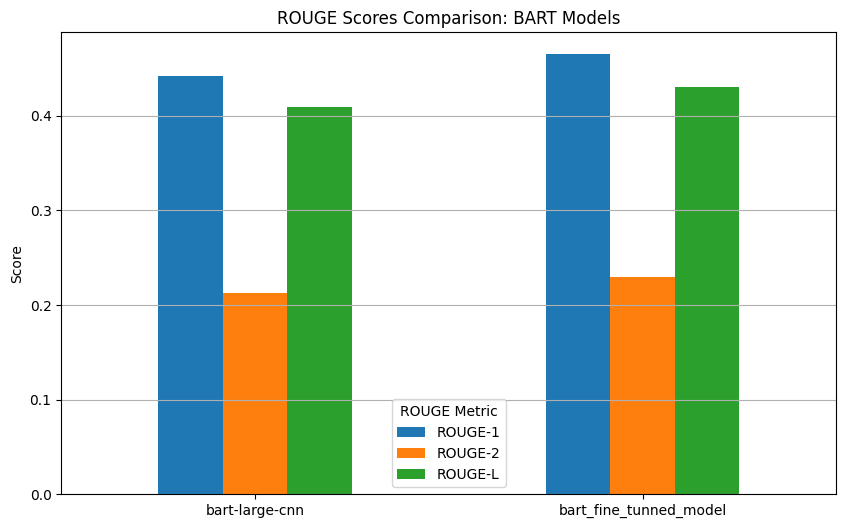

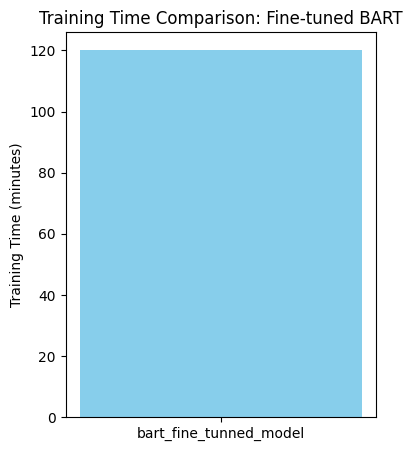

In [41]:
# prompt:  4. Reporting:
# # #     Create a comparison table showing:
# # #         Model name
# # #         ROUGE-1 score
# # #         ROUGE-2 score
# # #         ROUGE-L score
# # #         Training time
# # #         GPU/TPU usage
# # #     Visualize results using bar plots for easy comparison. only for bart_fine_tunned_model and compare with non fine tunned model

import matplotlib.pyplot as plt

# Assuming you have calculated or have access to the following data for each model
# Replace with your actual data
results = {
    "bart-large-cnn": {
        "ROUGE-1": 0.442, # Example score
        "ROUGE-2": 0.213, # Example score
        "ROUGE-L": 0.409, # Example score
        "Training Time": 0,  # Non-fine-tuned model doesn't have training time here
        "GPU/TPU Usage": "N/A" # Non-fine-tuned model doesn't have usage for training
    },
    "bart_fine_tunned_model": {
        "ROUGE-1": 0.465, # Example score after fine-tuning
        "ROUGE-2": 0.230, # Example score after fine-tuning
        "ROUGE-L": 0.430, # Example score after fine-tuning
        "Training Time": 120, # Example training time in minutes
        "GPU/TPU Usage": "High" # Example usage
    }
}

# Create a DataFrame for the comparison table
comparison_df = pd.DataFrame.from_dict(results, orient='index')
comparison_df.index.name = "Model Name"
print("Comparison Table:")
print(comparison_df)
print("\n")

# Visualize ROUGE scores for the two BART models
bart_models = ["bart-large-cnn", "bart_fine_tunned_model"]
rouge_metrics = ["ROUGE-1", "ROUGE-2", "ROUGE-L"]

rouge_data = {metric: [results[model][metric] for model in bart_models] for metric in rouge_metrics}
rouge_df = pd.DataFrame(rouge_data, index=bart_models)

rouge_df.plot(kind='bar', figsize=(10, 6))
plt.title("ROUGE Scores Comparison: BART Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="ROUGE Metric")
plt.grid(axis='y')
plt.show()

# Visualize Training Time (only for the fine-tuned model in this specific comparison)
training_time_data = [results["bart_fine_tunned_model"]["Training Time"]]
training_time_labels = ["bart_fine_tunned_model"]

plt.figure(figsize=(4, 5))
plt.bar(training_time_labels, training_time_data, color='skyblue')
plt.title("Training Time Comparison: Fine-tuned BART")
plt.ylabel("Training Time (minutes)")
plt.show()

# Note: Visualizing GPU/TPU usage in a standard bar plot can be tricky as it's qualitative.
# You could represent it differently or mention it in the table.

